In [1]:
import ee
# Earth Engine setup
# Nearly every example uses the Earth Engine API so you'll need to import the API, authenticate, and initialize.
ee.Authenticate()
ee.Initialize()
print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())


Successfully saved authorization token.
NASADEM: NASA NASADEM Digital Elevation 30m


- `sample()`: samples the image (does NOT work for an `ee.ImageCollection` — we'll talk about sampling an `ee.ImageCollection` later) according to a given geometry and a scale (in meters) of the projection to sample in. It returns an `ee.FeatureCollection`.
- `first()`: returns the first entry of the collection,
- `get()`: to select the appropriate band of your Image/Collection,
- `getInfo()`: evaluates server-side expression graph and transfers result to client.

In [2]:
# Initialize the Earth Engine module.
ee.Initialize()

# Print metadata for a DEM dataset.
print(ee.Image('USGS/SRTMGL1_003').getInfo())

{'type': 'Image', 'bands': [{'id': 'elevation', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [1296001, 417601], 'crs': 'EPSG:4326', 'crs_transform': [0.0002777777777777778, 0, -180.0001388888889, 0, -0.0002777777777777778, 60.00013888888889]}], 'id': 'USGS/SRTMGL1_003', 'version': 1641990767055141, 'properties': {'system:visualization_0_min': '0.0', 'type_name': 'Image', 'keywords': ['dem', 'elevation', 'geophysical', 'nasa', 'srtm', 'topography', 'usgs'], 'thumb': 'https://mw1.google.com/ges/dd/images/SRTM90_V4_thumb.png', 'description': '<p>The Shuttle Radar Topography Mission (SRTM, see <a href="https://onlinelibrary.wiley.com/doi/10.1029/2005RG000183/full">Farr\net al. 2007</a>)\ndigital elevation data is an international research effort that\nobtained digital elevation models on a near-global scale. This\nSRTM V3 product (SRTM Plus) is provided by NASA JPL\nat a resolution of 1 arc-second (approximately 30m).</p><p>This dataset

In [3]:
# Load a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Print image object WITHOUT call to getInfo(); prints serialized request instructions.
print(img)

# Print image object WITH call to getInfo(); prints image metadata.
print(img.getInfo())

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.load",
    "arguments": {
      "id": {
        "constantValue": "LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913"
      }
    }
  }
})
{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 27

# Folium interactive map display

In [2]:
import folium
from folium import plugins

# Define a method for displaying Earth Engine image tiles on a folium map.
def add_ee_layer(self, ee_object, vis_params, name):
    
    try:    
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):    
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):    
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):    
            folium.GeoJson(
            data = ee_object.getInfo(),
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):  
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
    
    except:
        print("Could not display {}".format(name))
    
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

## custom basemaps

In [3]:
# Add custom basemaps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    ),
    'OpenTopoMap':folium.TileLayer(
        tiles = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
        attr = 'OpenTopoMap',
        name = 'OpenTopoMap',
        overlay = True,
        control = True
    )
}

# Test API

In [4]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003') #NASA SRTM Digital Elevation 30m
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


# Use IPython.display.module

In [5]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

## Use Folium to display

In [ ]:
dem = ee.Image('USGS/SRTMGL1_003') #NASA SRTM Digital Elevation 30m

# Get a feature collection of administrative boundaries.
countries = ee.FeatureCollection('FAO/GAUL/2015/level0').select('ADM0_NAME')

# Filter the feature collection to subset France.
india = countries.filter(ee.Filter.eq('ADM0_NAME', 'India'))

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)
basemaps['Google Satellite Hybrid'].add_to(my_map)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')
# add india boundaries
my_map.add_ee_layer(india, {}, 'India')
# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Add fullscreen button
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)

# Updating different elevation mask

In [5]:
dem = ee.Image('USGS/SRTMGL1_003') #NASA SRTM Digital Elevation 30m
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

vis_params_flood = {
  'min': 0,
  'max': 50,
  'opacity':0.5,
  'palette': ['0000ff']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)
basemaps['Google Satellite Hybrid'].add_to(my_map)
basemaps['OpenTopoMap'].add_to(my_map)

# Add the elevation model to the map object.
# Make pixels with elevation below sea level transparent.
# .gt(): Returns 1 iff the first value is greater than the second.
# .updateMask(): Updates an image's mask at all positions where the existing mask is not zero. The output image retains the metadata and footprint of the input image.
mask = dem.gt(50) # DEM > 50, 1,0 --> apply mas
my_map.add_ee_layer(dem.updateMask(mask), vis_params, 'DEM_50')
# eq():  The type of the output pixels is boolean.
# where mask equals to 0 --> DEM<50, then mask = 1
flood_map = dem.updateMask(mask.eq(0))
my_map.add_ee_layer(flood_map, vis_params_flood, 'flood')
# my_map.add_ee_layer(dem.And(DEM_50), vis_params_flood, 'Flood')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Add fullscreen button
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)

# A complete example

- DEM
- Global Surface Water
- Boundary layer

In [16]:
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[40.33, -99.42], zoom_start=4, height=500)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)
basemaps['Google Satellite Hybrid'].add_to(my_map)

# Add the elevation model to the map object.
# Make pixels with elevation below sea level transparent.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display ee.Image
dataset = ee.Image('JRC/GSW1_1/GlobalSurfaceWater')
occurrence = dataset.select('occurrence');
occurrenceVis = {'min': 0.0, 'max': 100.0, 'palette': ['ffffff', 'ffbbbb', '0000ff']}
my_map.add_ee_layer(occurrence, occurrenceVis, 'JRC Surface Water')

# Display ee.Geometry
holePoly = ee.Geometry.Polygon(coords = [[[-35, -10], [-35, 10], [35, 10], [35, -10], [-35, -10]]],
                               proj= 'EPSG:4326',
                               geodesic = True,
                               maxError= 1.,
                               evenOdd = False)
my_map.add_ee_layer(holePoly, {}, 'Polygon')

# Display ee.FeatureCollection
fc = ee.FeatureCollection('TIGER/2018/States')
my_map.add_ee_layer(fc, {}, 'US States')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)

# Export image

In [17]:
task = ee.batch.Export.image.toDrive(image=dem,
                                     description='SRTM_DEM',
                                     scale=30,
                                     fileNamePrefix='SRTM_DEM',
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF',
                                     maxPixels= 1e12)
task.start()

In [35]:
task.status()

{'state': 'FAILED',
 'description': 'SRTM_DEM',
 'creation_timestamp_ms': 1687397062326,
 'update_timestamp_ms': 1687400572518,
 'start_timestamp_ms': 1687397068264,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'error_message': 'Not enough space in Google Drive (need 121GB for this export).',
 'id': '6VW7UHK3PXWT7ZKSCXDXAJYI',
 'name': 'projects/earthengine-legacy/operations/6VW7UHK3PXWT7ZKSCXDXAJYI'}

# Export as tiles

In [7]:
ee.batch.Export.map.toCloudStorage(image=flood_map,
                                     description='flood_map_50m',
                                     bucket=bucket_name,
                                     fileNamePrefix='flood_map_50m',
                                     fileFormat= 'auto',
                                     maxZoom=13,
                                    writePublicTiles= True,
                                    mapsApiKey=API_key,
                                    bucketCorsUris=['http://127.0.0.1:5000/test'])

<Task EXPORT_TILES: flood_map_50m (UNSUBMITTED)>

# Use GEEMAP

In [1]:
import ee
import geemap
import os

In [8]:
Map = geemap.Map(toolbar_ctrl=True, layer_ctrl=True)
Map.add_basemap('OpenTopoMap')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [9]:
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
# landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
# landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
# states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

vis_params_flood = {
  'min': 0,
  'max': 50,
  'opacity':0.5,
  'palette': ['0000ff']}

vis_params_sw = {
  'bands': ['occurrence'],
  'min': 0.0,
  'max': 100.0,
  'palette': ['ffffff', 'ffbbbb', '0000ff']
};

# Add Earth Engine layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
flood_level = 50
mask = dem.gt(flood_level) # DEM > 50, 1,0 --> apply mas
Map.addLayer(dem.updateMask(mask), vis_params, 'DEM_50')
# eq():  The type of the output pixels is boolean.
# where mask equals to 0 --> DEM<50, then mask = 1
flood_map = dem.updateMask(mask.eq(0))

Map.addLayer(flood_map, vis_params_flood, f'Flood_{flood_level}', True, 0.5)

# global surface water
dataset = ee.Image('JRC/GSW1_1/GlobalSurfaceWater')
Map.addLayer(dataset, vis_params_sw, f'global surface water', True, 0.5)

# clip flood map to country boundary
country_boundaries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
flood_map_clipped = flood_map.clip(country_boundaries)
Map.addLayer(flood_map_clipped, vis_params_flood, f'Flood_clipped_{flood_level}', True, 0.5)
# Convert the flood layers to vectors

# # Load a Japan boundary from the Large Scale International Boundary dataset.
# country_boundaries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

# Map.addLayer(country_boundaries, {}, 'country_boundaries')
vectors = flood_map_clipped.reduceToVectors(
  geometry = country_boundaries,
  crs = dem.projection(),
  scale = 1000,
  geometryType= 'polygon',
  eightConnected= False,
  labelProperty= 'zone',
  reducer= ee.Reducer.mean()
)

# # Make a display image for the vectors, add it to the map.
display = ee.Image(0).updateMask(0).paint(vectors, '000000', 3)
Map.addLayer(display, {'palette': '000000'}, 'vectors')

EEException: Collection.geometry: Geometry has too many edges (3970390 > 2000000).

In [8]:
Map.to_html(filename=os.path.join('templates','floodmap_gee.html'), title='My Map', width='100%', height='880px')

In [9]:
import ee
import geemap.foliumap as geemap

In [15]:
params = {
    'width': 4.0,
    'height': 0.3,
    'vmin': 0,
    'vmax': 6000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],#'terrain',
    'label': 'Elevation (m)',
    'orientation': 'horizontal',
    'transparent': False,
}

'c:\\Users\\PAKHUIYING\\Documents\\Programming\\SIHTeamUniform\\colorbar.png'

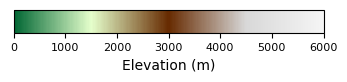

In [16]:
geemap.save_colorbar('colorbar.png', **params)


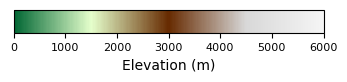

In [20]:
Map = geemap.Map()
# add topo
dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 6000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
# Map.addLayer(dem, vis_params, 'SRTM')

Map.add_colormap(position=(55, 5), **params)

vis_params_flood = {
  'min': 0,
  'max': 50,
  'opacity':0.5,
  'palette': ['0000ff']}

# Add Earth Engine layers to Map
flood_level = 50
mask = dem.gt(flood_level) # DEM > 50, 1,0 --> apply mas
Map.addLayer(dem.updateMask(mask), vis_params, f'DEM_{flood_level}')
# eq():  The type of the output pixels is boolean.
# where mask equals to 0 --> DEM<50, then mask = 1
flood_map = dem.updateMask(mask.eq(0))

Map.addLayer(flood_map, vis_params_flood, f'Flood_{flood_level}', True, 0.5)

Map

In [36]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/mickeykedia/9d9144072c5f637c26995569dd347614/raw/b65134846607235adf4ad6498713deed77d3b4b5/ward_level_collated.csv')
df_cropped = df.loc[:,['Ward_Alphabet','Ward_Names','TOT_P_DEN']].set_index(['Ward_Alphabet'])
df_cropped.to_csv('mumbai_popn_density.csv')
df_dict = df_cropped.to_dict('index')

In [35]:
df_dict

{'A': {'Ward_Names': 'Colaba', 'TOT_P_DEN': 14801.12},
 'B': {'Ward_Names': 'Sandhurst Road', 'TOT_P_DEN': 50916.0},
 'C': {'Ward_Names': 'Marine Lines', 'TOT_P_DEN': 92311.67},
 'D': {'Ward_Names': 'Grant Road', 'TOT_P_DEN': 52555.45},
 'E': {'Ward_Names': 'Byculla', 'TOT_P_DEN': 53146.76},
 'F/N': {'Ward_Names': 'Matunga', 'TOT_P_DEN': 40694.92},
 'F/S': {'Ward_Names': 'Parel', 'TOT_P_DEN': 25783.71},
 'G/N': {'Ward_Names': 'Dadar/Plaza', 'TOT_P_DEN': 41510.88},
 'G/S': {'Ward_Names': 'Elphinstone', 'TOT_P_DEN': 59903.9},
 'H/E': {'Ward_Names': 'Khar/Santacruz', 'TOT_P_DEN': 22783.78},
 'H/W': {'Ward_Names': 'Bandra', 'TOT_P_DEN': 48037.84},
 'K/E': {'Ward_Names': 'Andheri (East)', 'TOT_P_DEN': 33221.17},
 'K/W': {'Ward_Names': 'Andheri (West)', 'TOT_P_DEN': 31995.21},
 'L': {'Ward_Names': 'Kurla', 'TOT_P_DEN': 56743.71},
 'M/E': {'Ward_Names': 'Chembur', 'TOT_P_DEN': 24852.92},
 'M/W': {'Ward_Names': 'Chembur (West)', 'TOT_P_DEN': 21122.72},
 'N': {'Ward_Names': 'Ghatkopar', 'TOT_P_